In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#importing dataset
data=pd.read_csv(r'C:\Users\GAMEZONED-PC\Quantum Learning\MEDICAL insurance PRICE.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.sex = data.sex.apply(lambda x: 0 if x == 'female' else 1)  #Male = 1 & Female = 0
data.smoker = data.smoker.apply(lambda x: 0 if x == 'no' else 1)  #yes = 1 & no = 0

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


<AxesSubplot:ylabel='Density'>

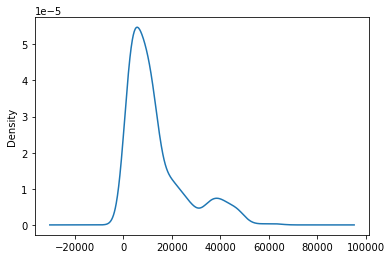

In [7]:
data['charges'].plot(kind='density')

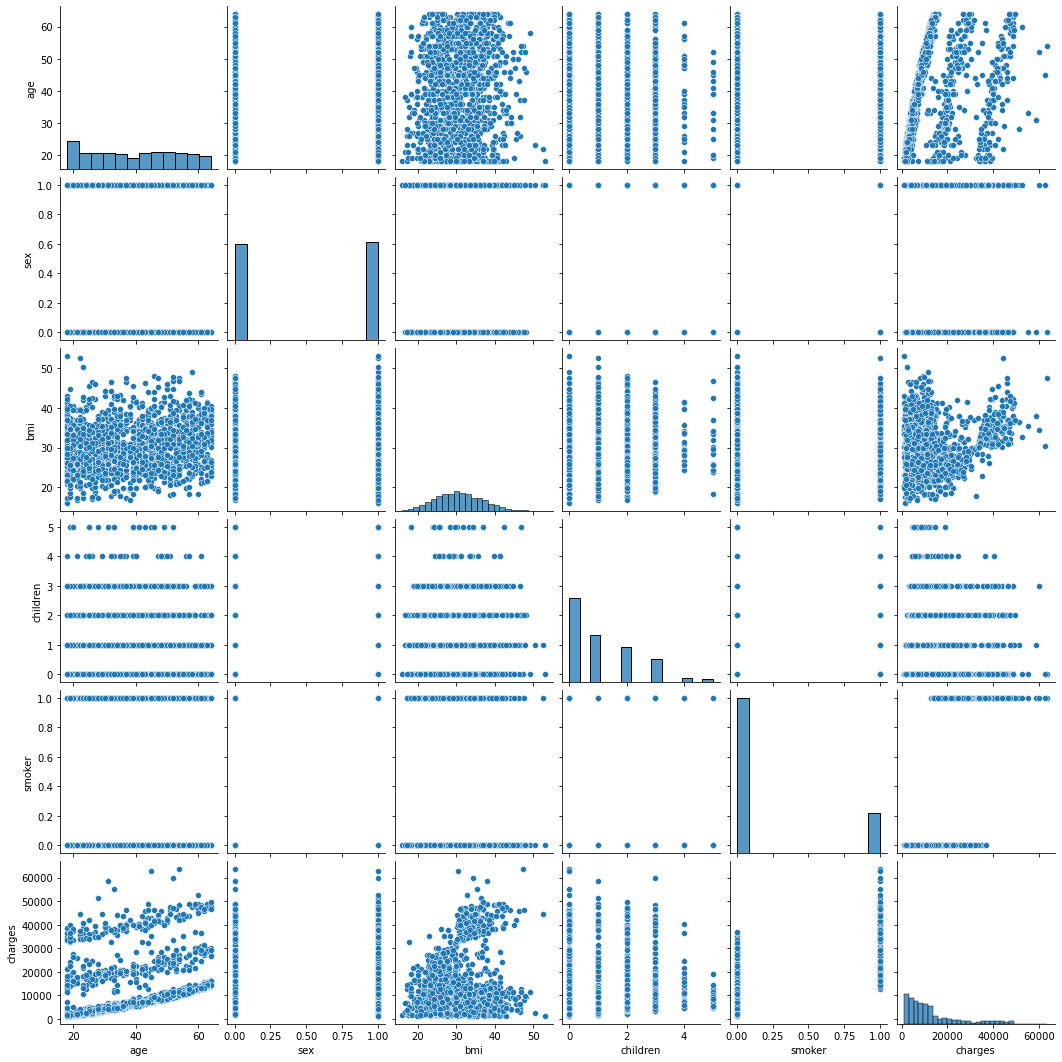

In [8]:
sns.pairplot(data)

<AxesSubplot:>

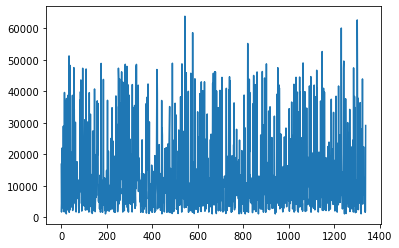

In [9]:
data.charges.plot()

In [10]:
data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [11]:
df=pd.get_dummies(data,drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [12]:
# Features
X = df.drop('charges', axis = 1)
# Target
y = df.charges

In [13]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [14]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[-1.47643983e+00,  9.92551107e-01,  3.67390113e+00, ...,
        -5.66557724e-01,  1.60953535e+00, -5.57919806e-01],
       [ 1.24949253e-03, -1.00750480e+00,  2.13575580e-01, ...,
         1.76504522e+00, -6.21297322e-01, -5.57919806e-01],
       [-1.26534135e+00, -1.00750480e+00, -2.15530358e+00, ...,
        -5.66557724e-01, -6.21297322e-01,  1.79237229e+00],
       ...,
       [ 4.93812599e-01, -1.00750480e+00, -6.70354501e-02, ...,
        -5.66557724e-01, -6.21297322e-01,  1.79237229e+00],
       [-6.32045930e-01, -1.00750480e+00, -1.41380525e+00, ...,
        -5.66557724e-01, -6.21297322e-01, -5.57919806e-01],
       [ 1.69003729e+00, -1.00750480e+00,  1.15655916e+00, ...,
        -5.66557724e-01, -6.21297322e-01,  1.79237229e+00]])

In [16]:
y_train

1317     1163.46270
794      7209.49180
680      2585.26900
795     18310.74200
887      5272.17580
           ...     
211      8162.71625
502     22218.11490
537      8825.08600
1220     4718.20355
175     48824.45000
Name: charges, Length: 1070, dtype: float64

In [17]:
# Specifying default linear kernel
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print("Training accuracy: ", lin_reg.score(X_train, y_train))
print("Testing accuracy: ", lin_reg.score(X_test, y_test))

Training accuracy:  0.7467955093844898
Testing accuracy:  0.763817072982393
